Today we are going to be working with the IMDB movie data set. Our goal is to eventually create a linear regression model that will enable us to predict the box office gross of a movie based on characteristics of the movie.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

step 1, fetch/read the data

In [3]:
df = pd.read_csv("movie_metadata.csv")
print(df.shape) ##always print the shape of the df
df.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


step 2: Now let’s quickly see the names and types of the columns.

In [4]:
len(df.dtypes) ##we get the column names and the data types of each column

28

In [5]:
##if we see the data, most of the columns are float, even the titleyear, we need to fix that
df['title_year'] = pd.to_datetime(df['title_year'], format = '%Y')
df['title_year']

0      2009-01-01
1      2007-01-01
2      2015-01-01
3      2012-01-01
4             NaT
          ...    
5038   2013-01-01
5039          NaT
5040   2013-01-01
5041   2012-01-01
5042   2004-01-01
Name: title_year, Length: 5043, dtype: datetime64[ns]

In [6]:
#now if we check the dtype of title_year its changed to datetime
df.dtypes

color                                object
director_name                        object
num_critic_for_reviews              float64
duration                            float64
director_facebook_likes             float64
actor_3_facebook_likes              float64
actor_2_name                         object
actor_1_facebook_likes              float64
gross                               float64
genres                               object
actor_1_name                         object
movie_title                          object
num_voted_users                       int64
cast_total_facebook_likes             int64
actor_3_name                         object
facenumber_in_poster                float64
plot_keywords                        object
movie_imdb_link                      object
num_user_for_reviews                float64
language                             object
country                              object
content_rating                       object
budget                          

step 3: If you do not plan on using some data in your analysis, drop those columns.

In [7]:
##we wont be using the follwoing columns in the analayis so we are going to drop them
df.drop(columns=['aspect_ratio', 'plot_keywords', 'movie_facebook_likes', 'genres'], inplace = True)

In [8]:
len(df.columns) ##out of 28 columns we are left with 24 now

24

In [9]:
df.drop([0,1,2,3], axis=0) ##whats the purpose of this?

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaT,12.0,7.1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010-01-01,553.0,7.8
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015-01-01,21000.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013-01-01,470.0,7.7
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaT,593.0,7.5
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013-01-01,0.0,6.3
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012-01-01,719.0,6.3


In [10]:
df[['budget','gross']] ##accessing two columns like this

,budget,gross
0,237000000.0,760505847.0
1,300000000.0,309404152.0
2,245000000.0,200074175.0
3,250000000.0,448130642.0
4,NaN,NaN
...,...,...
5038,NaN,NaN
5039,NaN,NaN
5040,1400.0,NaN
5041,NaN,10443.0


step 4: now we investigate the data

In [11]:
##get the total number of movies in all countries
df['country'].value_counts()

USA                   3807
UK                     448
France                 154
Canada                 126
Germany                 97
                      ... 
Dominican Republic       1
Nigeria                  1
Bahamas                  1
Peru                     1
Bulgaria                 1
Name: country, Length: 65, dtype: int64

In [12]:
##only want movies in usa
df=df[df['country'] == 'USA']
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9000.0,2011-01-01,205.0,6.4
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaT,593.0,7.5
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013-01-01,0.0,6.3
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012-01-01,719.0,6.3


In [13]:
df['content_rating'].value_counts()

R            1571
PG-13        1208
PG            558
G              85
Not Rated      51
Approved       46
Unrated        38
TV-14          25
TV-PG          13
TV-MA          12
X              12
Passed          9
TV-G            8
NC-17           5
GP              4
M               3
TV-Y7           1
Name: content_rating, dtype: int64

In [14]:
##running the groupby query here 
df.groupby('content_rating')['gross'].mean() ##grouped and sorted

content_rating
Approved     6.035935e+07
G            9.597624e+07
GP                    NaN
M            1.023089e+08
NC-17        6.394892e+05
Not Rated    4.358239e+06
PG           7.881736e+07
PG-13        7.043976e+07
Passed       1.100354e+07
R            3.490640e+07
TV-14                 NaN
TV-G                  NaN
TV-MA                 NaN
TV-PG                 NaN
TV-Y7                 NaN
Unrated      7.000637e+06
X            2.071797e+07
Name: gross, dtype: float64

In [15]:
##identify the unique values for the content_rating columns
uniq_con = list(df['content_rating'].unique())
uniq_con

['PG-13',
 'PG',
 'G',
 'R',
 'TV-14',
 'TV-PG',
 'TV-MA',
 'TV-G',
 nan,
 'Unrated',
 'Approved',
 'X',
 'TV-Y7',
 'GP',
 'Not Rated',
 'Passed',
 'M',
 'NC-17']

In [16]:
##now we see that there are alot of rating types that don't have much ratings so we will remove them,  
unrated = ['Unrated','Approved', 'Not Rated', 'TV-MA', 'M', 'GP', 'Passed', np.nan, 'X', 'NC-17','TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'TV-Y7']
##now filter out the ones that are not in the unrated list
rated = [i for i in uniq_con if i not in unrated]
rated

['PG-13', 'PG', 'G', 'R']

In [17]:
##now we amke key value pairs for the unrated list, and setting all values to unrated, as we wont be using them
unrated_dict = dict.fromkeys(unrated, 'unrated')
unrated_dict

{'Unrated': 'unrated',
 'Approved': 'unrated',
 'Not Rated': 'unrated',
 'TV-MA': 'unrated',
 'M': 'unrated',
 'GP': 'unrated',
 'Passed': 'unrated',
 nan: 'unrated',
 'X': 'unrated',
 'NC-17': 'unrated',
 'TV-14': 'unrated',
 'TV-PG': 'unrated',
 'TV-G': 'unrated',
 'TV-Y': 'unrated',
 'TV-Y7': 'unrated'}

In [18]:
##like above, create the rated dictionar
rated_dict = dict(zip(rated, rated))
rated_dict

{'PG-13': 'PG-13', 'PG': 'PG', 'G': 'G', 'R': 'R'}

In [19]:
##now that we have both dictionaries ready we'll map them together
ratings_map = {**rated_dict, **unrated_dict} ## the ** here takes the dictionary passed through and unpacks it as we zipped it
ratings_map

{'PG-13': 'PG-13',
 'PG': 'PG',
 'G': 'G',
 'R': 'R',
 'Unrated': 'unrated',
 'Approved': 'unrated',
 'Not Rated': 'unrated',
 'TV-MA': 'unrated',
 'M': 'unrated',
 'GP': 'unrated',
 'Passed': 'unrated',
 nan: 'unrated',
 'X': 'unrated',
 'NC-17': 'unrated',
 'TV-14': 'unrated',
 'TV-PG': 'unrated',
 'TV-G': 'unrated',
 'TV-Y': 'unrated',
 'TV-Y7': 'unrated'}

In [20]:
# use the pandas map function to change the content_rating column, we'll insert the dictionary into the df
df['rating'] = df['content_rating'].map(ratings_map) ##adding a new column into the data frame
df.rating

0         PG-13
1         PG-13
3         PG-13
5         PG-13
6         PG-13
         ...   
5037    unrated
5039    unrated
5040    unrated
5041      PG-13
5042         PG
Name: rating, Length: 3807, dtype: object

In [21]:
##now compare the two columns
df[['rating', 'content_rating']].tail()

,rating,content_rating
5037,unrated,Not Rated
5039,unrated,TV-14
5040,unrated,NaN
5041,PG-13,PG-13
5042,PG,PG


In [22]:
df['rating'].value_counts()

R          1571
PG-13      1208
PG          558
unrated     385
G            85
Name: rating, dtype: int64

now that we have some meaningful data, we now need to handle the missing/null data


In [23]:
##shows all the missing data in the data frame
df.isna()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5039,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
5040,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [24]:
##find the % of missing data in each column
df.isna().mean()

color                        0.003677
director_name                0.019438
num_critic_for_reviews       0.010244
duration                     0.001576
director_facebook_likes      0.019438
actor_3_facebook_likes       0.003415
actor_2_name                 0.001839
actor_1_facebook_likes       0.001051
gross                        0.150250
actor_1_name                 0.001051
movie_title                  0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.000000
actor_3_name                 0.003415
facenumber_in_poster         0.003152
movie_imdb_link              0.000000
num_user_for_reviews         0.003415
language                     0.002627
country                      0.000000
content_rating               0.041502
budget                       0.078277
title_year                   0.019438
actor_2_facebook_likes       0.001839
imdb_score                   0.000000
rating                       0.000000
dtype: float64

<AxesSubplot:>

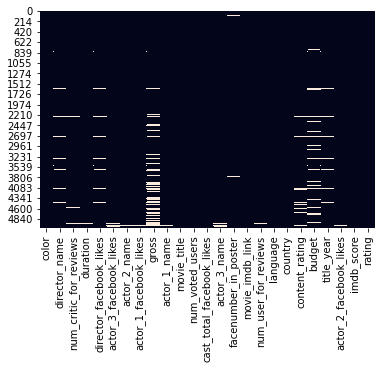

In [25]:
##we can also see the missing data graphically using a heatmap
sns.heatmap(df.isna(), cbar= False)

One way to handle missing data is just to drop the observation from the data set. This is not always the ideal way since you will lose obseervations, but it might be unavoidable. For example, we want to predict the gross earnings for each film, so we have to remove those that don't have value for gross.

In [26]:
##so now we drop the missing values, dopna drops the missing values from the desired column
df_dropped = df.dropna(subset=['gross'], inplace = True)
df_dropped

<AxesSubplot:>

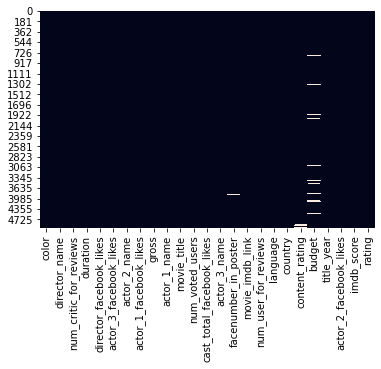

In [27]:
sns.heatmap(df.isnull(), cbar=False)

In [28]:
##we see that the budget column also has missing values, we'll cater to them using a different way as we dont want to drop these values
df[df['budget'].isna()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating
55,Color,Peter Sohn,298.0,93.0,113.0,113.0,Jack McGraw,275.0,123070338.0,A.J. Buckley,The Good Dinosaur,62836,696,Peter Sohn,0.0,http://www.imdb.com/title/tt1979388/?ref_=fn_t...,345.0,English,USA,PG,NaN,2015-01-01,150.0,6.8,PG
444,Color,Gary Winick,120.0,97.0,56.0,852.0,Julia Roberts,12000.0,82506325.0,Steve Buscemi,Charlotte's Web,27838,23907,Oprah Winfrey,0.0,http://www.imdb.com/title/tt0413895/?ref_=fn_t...,102.0,English,USA,G,NaN,2006-01-01,8000.0,6.4,G
477,Color,Henry Jaglom,19.0,117.0,69.0,87.0,Stephen Dillane,898.0,821997.0,Vanessa Redgrave,Déjà Vu,666,1753,Michael Brandon,0.0,http://www.imdb.com/title/tt0119033/?ref_=fn_t...,40.0,English,USA,PG-13,NaN,1997-01-01,577.0,7.0,PG-13
490,Color,Lee Tamahori,95.0,117.0,93.0,904.0,Harold Perrineau,12000.0,27779888.0,Anthony Hopkins,The Edge,55913,14831,Bart the Bear,2.0,http://www.imdb.com/title/tt0119051/?ref_=fn_t...,182.0,English,USA,R,NaN,1997-01-01,1000.0,6.9,R
559,Color,David Pastor,130.0,84.0,10.0,394.0,Kiernan Shipka,3000.0,90820.0,Christopher Meloni,Carriers,35510,4368,Lou Taylor Pucci,0.0,http://www.imdb.com/title/tt0806203/?ref_=fn_t...,119.0,English,USA,PG-13,NaN,2009-01-01,552.0,6.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,Color,Peter Chelsom,57.0,100.0,23.0,545.0,Elden Henson,1000.0,2643689.0,Kieran Culkin,The Mighty,10499,2283,Gena Rowlands,4.0,http://www.imdb.com/title/tt0119670/?ref_=fn_t...,113.0,English,USA,PG-13,NaN,1998-01-01,577.0,7.3,PG-13
4974,Color,Julie Davis,5.0,86.0,12.0,117.0,Meredith Scott Lynn,238.0,33598.0,Jack McGee,"I Love You, Don't Touch Me!",405,623,Tim DeZarn,1.0,http://www.imdb.com/title/tt0130019/?ref_=fn_t...,15.0,English,USA,R,NaN,1997-01-01,166.0,5.4,R
5001,Color,Martin Scorsese,71.0,117.0,17000.0,476.0,Levon Helm,725.0,321952.0,Ringo Starr,The Last Waltz,12611,2783,Bob Dylan,0.0,http://www.imdb.com/title/tt0077838/?ref_=fn_t...,113.0,English,USA,PG,NaN,1978-01-01,572.0,8.2,PG
5003,Color,Bradley Rust Gray,61.0,79.0,2.0,20.0,Mark Rendall,962.0,24705.0,Zoe Kazan,The Exploding Girl,1516,1054,Jordan Scovel,0.0,http://www.imdb.com/title/tt1294161/?ref_=fn_t...,10.0,English,USA,Unrated,NaN,2009-01-01,72.0,6.3,unrated


<AxesSubplot:>

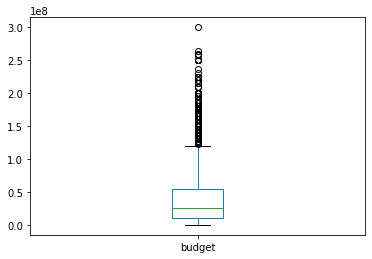

In [29]:
df['budget'].plot(kind='box') ##see all the values in a graph, now we can replace the missing values with the average

In [30]:
df['budget'].fillna(df['budget'].mean(),inplace = False)

0       2.370000e+08
1       3.000000e+08
3       2.500000e+08
5       2.637000e+08
6       2.580000e+08
            ...     
5033    7.000000e+03
5035    7.000000e+03
5037    9.000000e+03
5041    4.003122e+07
5042    1.100000e+03
Name: budget, Length: 3235, dtype: float64

In [31]:
df[df['budget'].isna()]##all the missing values have been filled

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating
55,Color,Peter Sohn,298.0,93.0,113.0,113.0,Jack McGraw,275.0,123070338.0,A.J. Buckley,The Good Dinosaur,62836,696,Peter Sohn,0.0,http://www.imdb.com/title/tt1979388/?ref_=fn_t...,345.0,English,USA,PG,NaN,2015-01-01,150.0,6.8,PG
444,Color,Gary Winick,120.0,97.0,56.0,852.0,Julia Roberts,12000.0,82506325.0,Steve Buscemi,Charlotte's Web,27838,23907,Oprah Winfrey,0.0,http://www.imdb.com/title/tt0413895/?ref_=fn_t...,102.0,English,USA,G,NaN,2006-01-01,8000.0,6.4,G
477,Color,Henry Jaglom,19.0,117.0,69.0,87.0,Stephen Dillane,898.0,821997.0,Vanessa Redgrave,Déjà Vu,666,1753,Michael Brandon,0.0,http://www.imdb.com/title/tt0119033/?ref_=fn_t...,40.0,English,USA,PG-13,NaN,1997-01-01,577.0,7.0,PG-13
490,Color,Lee Tamahori,95.0,117.0,93.0,904.0,Harold Perrineau,12000.0,27779888.0,Anthony Hopkins,The Edge,55913,14831,Bart the Bear,2.0,http://www.imdb.com/title/tt0119051/?ref_=fn_t...,182.0,English,USA,R,NaN,1997-01-01,1000.0,6.9,R
559,Color,David Pastor,130.0,84.0,10.0,394.0,Kiernan Shipka,3000.0,90820.0,Christopher Meloni,Carriers,35510,4368,Lou Taylor Pucci,0.0,http://www.imdb.com/title/tt0806203/?ref_=fn_t...,119.0,English,USA,PG-13,NaN,2009-01-01,552.0,6.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,Color,Peter Chelsom,57.0,100.0,23.0,545.0,Elden Henson,1000.0,2643689.0,Kieran Culkin,The Mighty,10499,2283,Gena Rowlands,4.0,http://www.imdb.com/title/tt0119670/?ref_=fn_t...,113.0,English,USA,PG-13,NaN,1998-01-01,577.0,7.3,PG-13
4974,Color,Julie Davis,5.0,86.0,12.0,117.0,Meredith Scott Lynn,238.0,33598.0,Jack McGee,"I Love You, Don't Touch Me!",405,623,Tim DeZarn,1.0,http://www.imdb.com/title/tt0130019/?ref_=fn_t...,15.0,English,USA,R,NaN,1997-01-01,166.0,5.4,R
5001,Color,Martin Scorsese,71.0,117.0,17000.0,476.0,Levon Helm,725.0,321952.0,Ringo Starr,The Last Waltz,12611,2783,Bob Dylan,0.0,http://www.imdb.com/title/tt0077838/?ref_=fn_t...,113.0,English,USA,PG,NaN,1978-01-01,572.0,8.2,PG
5003,Color,Bradley Rust Gray,61.0,79.0,2.0,20.0,Mark Rendall,962.0,24705.0,Zoe Kazan,The Exploding Girl,1516,1054,Jordan Scovel,0.0,http://www.imdb.com/title/tt1294161/?ref_=fn_t...,10.0,English,USA,Unrated,NaN,2009-01-01,72.0,6.3,unrated


<AxesSubplot:xlabel='rating'>

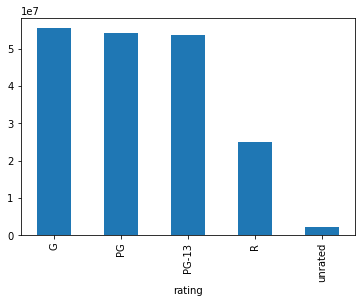

In [32]:
##plot a graph with ratings grouped by budget
df.groupby('rating')['budget'].mean().plot(kind='bar')

<AxesSubplot:>

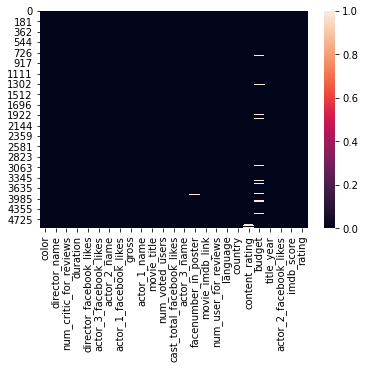

In [33]:
sns.heatmap(df.isna(), cbar=True) #all the values have been filled

In [34]:
#form a dictionary with budget and ratings
budget_ratings = df.groupby('rating')['budget'].mean().round(1).to_dict() #round off to 1 decimal place
budget_ratings

{'G': 55436014.1,
 'PG': 54076105.4,
 'PG-13': 53681048.4,
 'R': 25078901.3,
 'unrated': 2228835.6}

In [35]:
#another way to fill the null vallues in the budget column is like 
df['budget'].fillna(df['rating'].map(budget_ratings), inplace=True)

<AxesSubplot:>

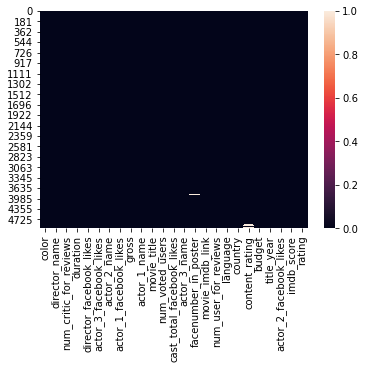

In [36]:
sns.heatmap(df.isna(), cbar=True) #check again, although all values have been filled with the previous method

there's a way to handle categorical data like ratings as there are multiple categories
A dummy variable (aka, an indicator variable) is a numeric variable that represents categorical data, such as gender, race, political affiliation, etc.

In [37]:
#here 1 represents the presence of that category and 0 represents the absence, we need these dummies for the regression model
pd.get_dummies(df['rating'].tail(10))

,PG,PG-13,R,unrated
5012,0,0,1,0
5015,0,0,1,0
5021,0,0,1,0
5023,0,0,0,1
5025,0,0,0,1
5033,0,1,0,0
5035,0,0,1,0
5037,0,0,0,1
5041,0,1,0,0
5042,1,0,0,0


Remember multi-collinearity?

If you have know the values of a movie for G, PG, PG-13, and R, then you already know the value for unrated.

Multi-collinearity can exist in the combination of multiple columns, so we need to drop one of them.

Using all the dummy variables derived from a category is known as the dummy variable trap. Avoid this trap!

Either don't include in the model or use the parameter drop_first=True (see below)

In [38]:
dummy_df = pd.get_dummies(df, columns=['rating'], drop_first=True)
dummy_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating_PG,rating_PG-13,rating_R,rating_unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,0,1,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,0,1,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,0,1,0,0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,0,1,0,0


In [39]:
##now we concatenate the above results in the dataframe that we already have 
df = pd.concat([df, pd.get_dummies(df['rating'])], 1)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating,G,PG,PG-13,R,unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,PG-13,0,0,1,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,PG-13,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,PG-13,0,0,1,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,PG-13,0,0,1,0,0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,PG-13,0,0,1,0,0


<AxesSubplot:>

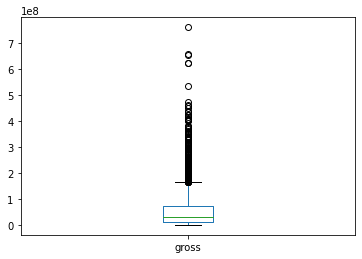

In [40]:
#removing the outliers now, we see here that there are 4 points that are outliers
df['gross'].plot(kind='box')

In [41]:
df.sort_values('gross', ascending = False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating,G,PG,PG-13,R,unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,PG-13,0,0,1,0,0
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997-01-01,14000.0,7.7,PG-13,0,0,1,0,0
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015-01-01,2000.0,7.0,PG-13,0,0,1,0,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012-01-01,21000.0,8.1,PG-13,0,0,1,0,0
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012-01-01,21000.0,8.1,PG-13,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,Color,U. Roberto Romano,3.0,80.0,6.0,NaN,NaN,NaN,2245.0,NaN,The Harvest/La Cosecha,57,0,NaN,0.0,http://www.imdb.com/title/tt1981703/?ref_=fn_t...,2.0,English,USA,NaN,560000.0,2011-01-01,NaN,7.2,unrated,0,0,0,0,1
4843,Color,John D. Hancock,4.0,110.0,44.0,221.0,Elizabeth Stenholt,644.0,1711.0,Trish Basinger,The Looking Glass,82,1440,Mary Norwood,0.0,http://www.imdb.com/title/tt2912776/?ref_=fn_t...,1.0,English,USA,NaN,2228835.6,2015-01-01,503.0,6.6,unrated,0,0,0,0,1
4758,Color,Alex Craig Mann,29.0,87.0,38.0,445.0,Christa B. Allen,552.0,1332.0,Justin Chon,Detention of the Dead,2038,2251,Max Adler,6.0,http://www.imdb.com/title/tt1865346/?ref_=fn_t...,20.0,English,USA,Not Rated,500000.0,2012-01-01,533.0,4.6,unrated,0,0,0,0,1
4915,Color,Ricki Stern,11.0,106.0,15.0,0.0,Evelyn Jefferson,2.0,1111.0,Darryl Hunt,The Trials of Darryl Hunt,771,2,John Reeves,0.0,http://www.imdb.com/title/tt0446055/?ref_=fn_t...,10.0,English,USA,PG-13,200000.0,2006-01-01,0.0,7.7,PG-13,0,0,1,0,0


In [42]:
# Calculate gross amount that is 5 times above the standard deviation
above_5std= df['gross'].mean() + (5*df['gross'].std())
above_5std

413880226.5631133

In [49]:
### Use a conditional selection to only return values lower than 5 standard deviations above the mean
below_5std=df[(df['gross']<=above_5std) & (df['gross']>1000000)]
below_5std.shape

(2898, 30)

In [53]:
# Create a new column called df.superstar where the value is 1
# if df.actor_1_facebook_likes is greater 25000 and 0 if not, we'll write the query here uisng numpy(np)
df['superstar'] = np.where(df['actor_1_facebook_likes']>25000, 1, 0)
df[['movie_title','actor_1_name','actor_1_facebook_likes', 'superstar']].head()

,movie_title,actor_1_name,actor_1_facebook_likes,superstar
0,Avatar,CCH Pounder,1000.0,0
1,Pirates of the Caribbean: At World's End,Johnny Depp,40000.0,1
3,The Dark Knight Rises,Tom Hardy,27000.0,1
5,John Carter,Daryl Sabara,640.0,0
6,Spider-Man 3,J.K. Simmons,24000.0,0


In [57]:
##create a new column with yearold name and it should have the number of years ago the movie was created
df['yearold'] = 2022-pd.DatetimeIndex(df['title_year']).year
df[['movie_title','yearold']].head()

,movie_title,yearold
0,Avatar,13
1,Pirates of the Caribbean: At World's End,15
3,The Dark Knight Rises,10
5,John Carter,10
6,Spider-Man 3,15


Now let's fit a model to this data where we try to explain the variance in the box office gross of a movie, using differen variables.

In [58]:
df = df[df['content_rating'].isin(['G', 'PG-13', 'PG', 'R'])]

In [60]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating,G,PG,PG-13,R,unrated,superstar,yearold
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,PG-13,0,0,1,0,0,0,13
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,PG-13,0,0,1,0,0,1,15
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,PG-13,0,0,1,0,0,1,10
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,PG-13,0,0,1,0,0,0,10
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,PG-13,0,0,1,0,0,0,15


In [61]:
#now it's time to add all features to our multiple linear model
from statsmodels.formula.api import ols

In [63]:
mlr_model = ols(formula='gross~duration+budget+yearold+superstar+G+PG+R+cast_total_facebook_likes', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     310.1
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:03:08   Log-Likelihood:                -60378.
No. Observations:                3141   AIC:                         1.208e+05
Df Residuals:                    3132   BIC:                         1.208e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -3.763e+07   5.39e+06     -6.980      0.000   -4.82e+07   -2.71e+07
duration                   3.377e+05   4.92e+04      6.866      0.000    2.41e+05    4.34e+05
budget                        0.9728      0.027     36.382      0.000       0.920       1.025
yearold                    8.326e+05    1.2e+05      6.922      0.000    5.97e+05    1.07e+06
superstar                  3.825e+06   5.26e+06      0.727      0.467   -6.49e+06    1.41e+07
G                          2.464e+07   6.61e+06      3.730      0.000    1.17e+07    3.76e+07
PG                         8.985e+06   2.95e+06      3.044      0.002     3.2e+06    1.48e+07
R                          -8.63e+06   2.26e+06     -3.820      0.000   -1.31e+07    -4.2e+06
cast_total_facebook_likes   304.1693     58.560      5.194      0.000     189.349     418.990
==============================================================================
Omnibus:                     1714.837   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23251.898
Skew:                           2.295   Prob(JB):                         0.00
Kurtosis:                      15.514   Cond. No.                     4.17e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpreting Dummy Coefficients¶

In [64]:
mlr_model = ols(formula='gross~G+PG+R', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     86.04
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.69e-53
Time:                        20:04:41   Log-Likelihood:                -61190.
No. Observations:                3142   AIC:                         1.224e+05
Df Residuals:                    3138   BIC:                         1.224e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.044e+07   2.04e+06     34.564      0.000    6.64e+07    7.44e+07
G           2.554e+07   8.33e+06      3.066      0.002    9.21e+06    4.19e+07
PG          8.378e+06   3.72e+06      2.255      0.024    1.09e+06    1.57e+07
R          -3.553e+07   2.75e+06    -12.901      0.000   -4.09e+07   -3.01e+07
==============================================================================
Omnibus:                     2037.248   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29886.583
Skew:                           2.884   Prob(JB):                         0.00
Kurtosis:                      16.965   Cond. No.                         7.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

subset= []

In [67]:
subset_scaled = []
for var in subset:
    new_col = var +"_scaled"
    df[new_col] = scaler.fit_transform(df[[var]])
    subset_scaled.append(new_col)

In [71]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating,G,PG,PG-13,R,unrated,superstar,yearold
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,PG-13,0,0,1,0,0,0,13
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,PG-13,0,0,1,0,0,1,15
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,PG-13,0,0,1,0,0,1,10
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,PG-13,0,0,1,0,0,0,10
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,PG-13,0,0,1,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,Color,Jay Duplass,51.0,85.0,157.0,10.0,Katie Aselton,830.0,192467.0,Mark Duplass,The Puffy Chair,4067,1064,Bari Hyman,0.0,http://www.imdb.com/title/tt0436689/?ref_=fn_t...,71.0,English,USA,R,15000.0,2005-01-01,224.0,6.6,R,0,0,0,1,0,0,17
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,7000.0,2004-01-01,45.0,7.0,PG-13,0,0,1,0,0,0,18
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7000.0,1992-01-01,20.0,6.9,R,0,0,0,1,0,0,30
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,53681048.4,2012-01-01,719.0,6.3,PG-13,0,0,1,0,0,0,10
